Import statements


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


Loading and preprocessing dataset

In [21]:
df = pd.read_csv("Phishing_Email.csv")
if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

In [22]:
print(df['Email Text'].isnull().sum())
df.dropna(subset=['Email Text'], inplace=True)
print(df['Email Text'].isnull().sum())

16
0


In [23]:
df['Email Type'] = df['Email Type'].map({'Phishing Email': 1, 'Safe Email': 0})
df.head()


,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


split data for training

In [24]:
x=df['Email Text']
y=df['Email Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

vectorize text: Scores words based on how often it is used in other emails text (x)

In [25]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)


Logistic regression


In [26]:
lg_model = LogisticRegression(max_iter=1000)
# train model on training data 
lg_model.fit(x_train_vectorized, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
# Predict labels for the test set
y_pred = lg_model.predict(x_test_vectorized)

# Compare predictions to true labels
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")


Test accuracy: 0.97


confusion matrix

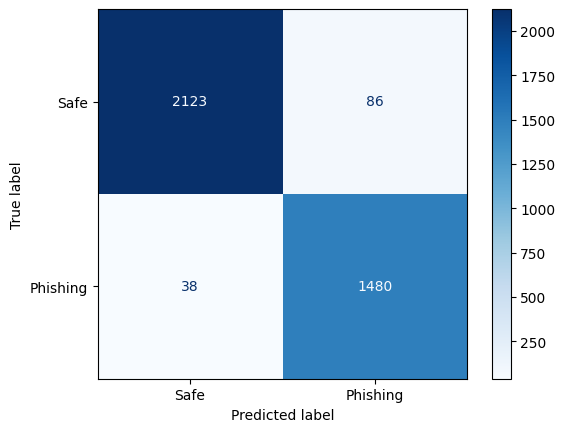

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from your model on test data
y_pred = lg_model.predict(x_test_vectorized)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.95
Recall: 0.97
F1 Score: 0.96


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize model
nb_model = MultinomialNB()

# Train
nb_model.fit(x_train_vectorized, y_train)

# Predict
y_pred_nb = nb_model.predict(x_test_vectorized)

# Evaluate
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))


Naive Bayes Test Accuracy: 0.9439227260531259
Precision: 0.9492107069320521
Recall: 0.9110671936758893
F1 Score: 0.9297478991596638


In [31]:
def predict_raw_email(text, model, vectorizer):
    vect = vectorizer.transform([text])  # no cleaning here
    pred = model.predict(vect)[0]
    return "Phishing Email" if pred == 1 else "Safe Email"


In [32]:
my_email = "Hi team,Just a quick reminder about our meeting scheduled for tomorrow at 10 AM. Please make sure to review the agenda beforehand.Thanks,Alex"

result = predict_raw_email(my_email, lg_model, vectorizer)
print(result)


Safe Email


In [33]:
import ipywidgets as widgets
from IPython.display import display

# Create a text area
email_input = widgets.Textarea(
    value='',
    placeholder='Paste email text here...',
    description='Email:',
    layout=widgets.Layout(width='80%', height='200px')
)

# Button to trigger prediction
predict_button = widgets.Button(description="Check Email")

# Output area
output = widgets.Output()

# Function to handle prediction
def predict_email_type(b):
    with output:
        output.clear_output()
        input_text = email_input.value
        if input_text.strip() == "":
            print("Please enter email content.")
            return
        input_vector = vectorizer.transform([input_text])
        prediction = lg_model.predict(input_vector)[0]
        result = "Phishing Email" if prediction == 1 else "Safe Email"
        print(f"Prediction: {result}")

# Link button click to function
predict_button.on_click(predict_email_type)

# Display all widgets
display(email_input, predict_button, output)


Textarea(value='', description='Email:', layout=Layout(height='200px', width='80%'), placeholder='Paste email …

Button(description='Check Email', style=ButtonStyle())

Output()

In [34]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(lg_model, f)

# Save the TF-IDF vectorizer
with open("tfidf.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
